In [147]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
import warnings
warnings.filterwarnings('ignore')

In [149]:
goalie_pull_data=pd.read_csv('./data/processed/goalie_pull_data_2011_2021.csv')
goalie_pull_data.head(2)

,game,total_sec,success
0,20112012_1.html.csv,34,0
1,20112012_100.html.csv,115,0


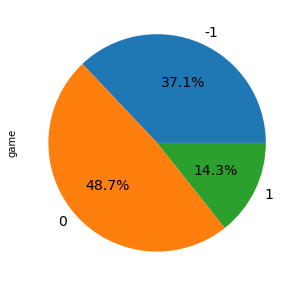

In [151]:
#What was the possiblity of different outcomes goalie pulled
fig, ax=plt.subplots(figsize=(5,5))
goalie_pull_data.groupby('success').count()['game'].plot.pie(autopct="%.1f%%",ax=ax,textprops={'fontsize': 14});

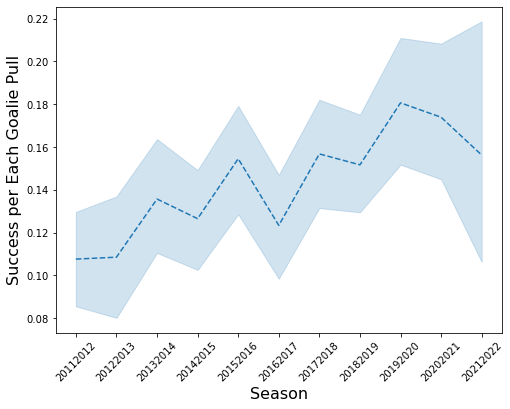

In [152]:
#No goal or one goal received are the same for the team pulling its goalie, so we replace the -1 with 0 in success
goalie_pull_data.loc[goalie_pull_data.success<0,'success']=0
#create season column 
goalie_pull_data['season']=goalie_pull_data.game.apply(lambda x: x.split('_')[0])

#plot the success rate for each season
fig, ax=plt.subplots(figsize=(8,6))
sns.lineplot(data=goalie_pull_data,x='season',y='success',linestyle='--',ax=ax)
ax.set_ylabel('Success per Each Goalie Pull', fontsize=16)
ax.set_xlabel('Season',fontsize=16)
plt.xticks(rotation = 45);

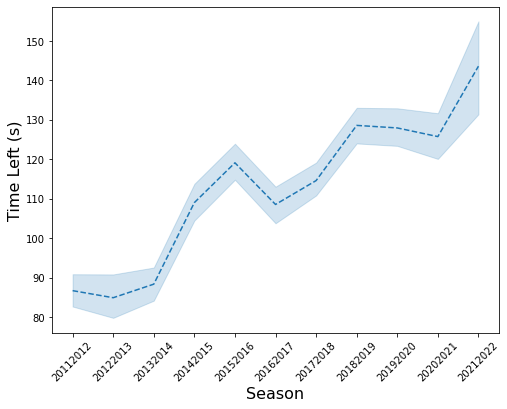

In [153]:
#convert the time into 20 second intervals 
goalie_pull_data['cut'] = pd.cut(goalie_pull_data['total_sec'],18, labels=False)
goalie_pulled_grouped=goalie_pull_data.groupby('cut').mean()

#plot average goalie pull time for each season
fig, ax=plt.subplots(figsize=(8,6))
sns.lineplot(data=goalie_pull_data,x='season',y='total_sec',linestyle='--',ax=ax)
ax.set_ylabel('Time Left (s)', fontsize=16)
ax.set_xlabel('Season',fontsize=16)
plt.xticks(rotation = 45);

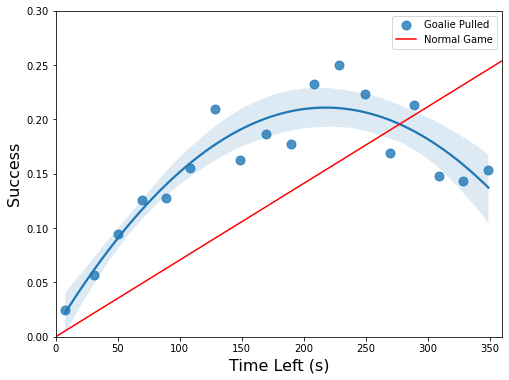

In [154]:
fig, ax=plt.subplots(figsize=(8,6))
sns.regplot(x="total_sec", y="success",
                data=goalie_pulled_grouped,scatter_kws={"s": 80},order=2,ax=ax,label='Goalie Pulled')
x = np.linspace(*ax.get_xlim())
ax.plot(x,0.00141/2*x,'r',label='Normal Game')
ax.set_xlim(0,360)
ax.set_ylim(0,0.3)
ax.set_xlabel('Time Left (s)')
ax.set_ylabel('Success', fontsize=16)
ax.set_xlabel('Time Left (s)',fontsize=16)
ax.legend()